In [934]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [935]:
df = pd.read_csv('responses2.csv')

In [936]:
print('List of non-integer columns:')
for id,dtyp in df.dtypes.iteritems():
    if dtyp=='object':
        print('-',id)

List of non-integer columns:
- Smoking
- Alcohol
- Punctuality
- Lying
- Internet usage
- Gender
- Left - right handed
- Education
- Only child
- Village - town
- House - block of flats


No columns with huge number of missing values
Columns with largest missing value count


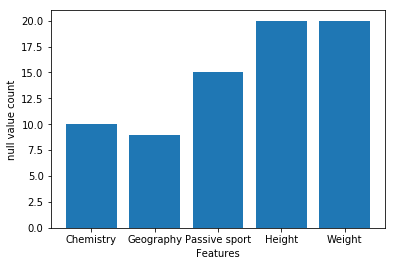

In [937]:
for id,val in df.isnull().sum().iteritems():
    if val>(0.2 * len(df)):
        print(id,val)
print("No columns with huge number of missing values")

print("Columns with largest missing value count")
idList = []
valList = []
for id,val in df.isnull().sum().iteritems():
    if val>(0.008 * len(df)):
        #print(id,'\t\t',val)
        idList.append(id)
        valList.append(val)
import seaborn as sns
import matplotlib.pyplot as plt
x = np.arange(len(idList))
plt.bar(x, height= valList)
plt.xticks(x, idList)
plt.ylabel("null value count")
plt.xlabel("Features")
plt.show()

In [938]:
for col in list(df):
    df[col].fillna(df[col].mode()[0], inplace = True)  

print("\nAny columns with remaining nulls?")
count =0
for id,val in df.isnull().sum().iteritems():
    if val>0:
        count = count +1
        print(id,val)
print(count)


Any columns with remaining nulls?
0


In [939]:
le = LabelEncoder()
categoricalFeatures = []
for col in [id for id,dtyp in df.dtypes.iteritems() if dtyp=='object']:
    categoricalFeatures.append(col)
    df[col] = le.fit_transform(df[col].astype('str'))
    #print(col,"\n",df[col][:5])
#df = df.drop(columns=categoricalFeatures)

In [940]:
df2 = df[categoricalFeatures]

In [941]:
print("DF shape: ",df.shape)
print("DF2 shape: ",df2.shape)

DF shape:  (1010, 150)
DF2 shape:  (1010, 11)


In [942]:
df=df.drop(categoricalFeatures, axis=1)

In [943]:
ohe = OneHotEncoder()
#for col in categoricalFeatures:
df = df.join(pd.DataFrame(ohe.fit_transform(df2).toarray()))
print("DF shape: ",df.shape)

DF shape:  (1010, 173)


In [944]:
emp = df['Empathy']
df = df.drop('Empathy',axis=1)

In [945]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer
rescaledX = MinMaxScaler(feature_range=(0, 1)).fit_transform(df)
standardizedX = StandardScaler().fit_transform(rescaledX)
normalizedX = Normalizer().fit_transform(standardizedX)

In [946]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import cross_val_score

dtree = DecisionTreeClassifier(max_depth=2)
knn = KNeighborsClassifier()
#svc = SVC(kernel='poly',degree=2, gamma = 1.2, C=1.2, coef0=1)
svc = LinearSVC(dual=False)#dual=False, C=2)
gnb = GaussianNB()
mlp = MLPClassifier()

In [ ]:
#t = list(df)
#t.remove('Empathy')

In [947]:
emp.shape

(1010,)

In [948]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, emp, test_size=0.2,random_state = 0)#(df[t], df['Empathy'], test_size=0.2)

In [949]:
X_train, X_dev, y_train, y_dev = train_test_split(X_train, y_train, test_size=0.2,random_state = 0)

In [1001]:
scores=[]
models=[]

In [1002]:
knn.fit(X_train,y_train)
print(knn.score(X_dev,y_dev))
scores.append(knn.score(X_dev,y_dev))
models.append("KNN")

0.271604938272


In [1003]:
gnb.fit(X_train,y_train)
print(gnb.score(X_dev,y_dev))
scores.append(gnb.score(X_dev,y_dev))
models.append("GaussianNB")

0.376543209877


In [710]:
from sklearn.model_selection import GridSearchCV
parameters = {'C':[0.01, 0.1, 2, 4, 8, 10], 'degree':[1,2,3,4,5,6]}
#parameters = {'dual':(False, True), 'C':[0.001, 0.01, 0.1, 1, 2, 3, 4, 5, 10]}
clf = GridSearchCV(svc, parameters)
clf.fit(X_train, y_train)
clf.score(X_dev, y_dev)

0.40740740740740738

In [699]:
clf.best_params_

{'C': 2, 'degree': 1}

In [1004]:
accSum = []
#for i in range(10):
svc.fit(X_train,y_train)
#accSum.append(
print(svc.score(X_dev,y_dev))
#np.mean(accSum)
scores.append(svc.score(X_dev,y_dev))
models.append("LinearSVC")

0.388888888889


In [1005]:
accSum = []
#for i in range(10):
dtree.fit(X_train,y_train)
#accSum.append(
print(dtree.score(X_dev,y_dev))
#np.mean(accSum)
scores.append(dtree.score(X_dev,y_dev))
models.append("DecisionTree")

0.395061728395


In [1006]:
accSum = []
for i in range(10):
    mlp.fit(X_train,y_train)
    accSum.append(mlp.score(X_dev,y_dev))
print("Dev: ",np.mean(accSum))
scores.append(np.mean(accSum))
models.append("MLP")
#print("Test: ",mlp.score(X_test,y_test))

Dev:  0.37962962963


In [1007]:
accSum

[0.36419753086419754,
 0.3888888888888889,
 0.35802469135802467,
 0.35802469135802467,
 0.37037037037037035,
 0.37037037037037035,
 0.35802469135802467,
 0.4567901234567901,
 0.40123456790123457,
 0.37037037037037035]

In [1008]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)
print(clf.score(X_dev, y_dev))
scores.append(clf.score(X_dev, y_dev))
models.append("RandomForest")

0.413580246914


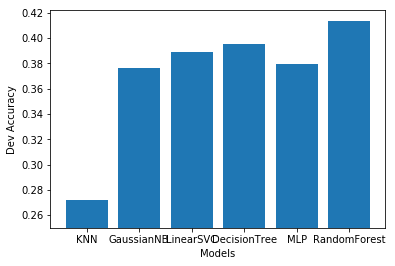

In [1009]:

x = np.arange(len(scores))
plt.bar(x, height= [(i-0.25) for i in scores],bottom=0.25)
plt.xticks(x, models)
plt.ylabel("Dev Accuracy")
plt.xlabel("Models")
plt.show()

In [1010]:
scores

[0.27160493827160492,
 0.37654320987654322,
 0.3888888888888889,
 0.39506172839506171,
 0.37962962962962959,
 0.41358024691358025]

In [843]:
clf = RandomForestClassifier(n_estimators=9,max_depth=6, random_state=0)
clf.fit(X_train, y_train)
clf.score(X_dev, y_dev)

0.3888888888888889

In [813]:
acc = 0
for nest in range(1,13):
    for dep in range(5,11):
        rfc = RandomForestClassifier(n_estimators=nest,max_depth=dep, random_state=0)
        rfc.fit(X_train, y_train)
        devScore = rfc.score(X_dev, y_dev)
        if devScore > acc:
            acc = devScore
            print()
            print(nest,dep)
            print("RandomForest score on dev",rfc.score(X_dev, y_dev))



1 5
RandomForest score on dev 0.333333333333

1 7
RandomForest score on dev 0.37037037037

2 5
RandomForest score on dev 0.376543209877

3 6
RandomForest score on dev 0.395061728395

5 5
RandomForest score on dev 0.401234567901

9 6
RandomForest score on dev 0.413580246914

11 7
RandomForest score on dev 0.425925925926


In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

accList=[]
bestAcc = 0.1
bestK = 1
for i in range(5):
    for k in range(1,170,10):
        
        X_new = SelectKBest(chi2, k).fit_transform(X_dev, y_dev)
        svcTuned.fit()
        
        #nowAcc = np.mean(cross_val_score(svc, X_new, df['Empathy'],cv=10))
        if nowAcc>bestAcc:
            bestAcc = nowAcc
            #bestK = k
    accList.append(bestAcc)
    print(bestAcc)
        
#print('k=',bestK)
print('Accuracy of baseline=',np.mean(accList))

In [648]:
kbesht = SelectKBest(chi2,20)
X_new = kbesht.fit_transform(X_dev, y_dev)
relevantCols = []
for col in kbesht.get_support(indices=True):
    relevantCols.append(df.columns[col])

#print(relevantCols)    

#X_train[relevantCols]
X_train = X_train[relevantCols]
X_dev = X_dev[relevantCols]
X_test = X_test[relevantCols]

In [1011]:
kbesht = SelectKBest(chi2, 11)
X_new = kbesht.fit_transform(X_train, y_train)
relevantCols = []
for col in kbesht.get_support(indices=True):
    relevantCols.append(df.columns[col])
rfc = RandomForestClassifier(n_estimators=10,max_depth=7, random_state=0)
rfc.fit(X_train[relevantCols], y_train)
print("RandomForest score on dev",rfc.score(X_dev[relevantCols], y_dev))
print("RandomForest score on test",rfc.score(X_test[relevantCols], y_test))
scores.append(rfc.score(X_dev[relevantCols], y_dev))
models.append("RandomForest Dev")
scores.append(rfc.score(X_test[relevantCols], y_test))
models.append("RandomForest Test")

RandomForest score on dev 0.487654320988
RandomForest score on test 0.39603960396


In [1039]:
#models#[0]='KNN'#.remove(models[-1])
scores#.remove(scores[-1])

[0.27160493827160492,
 0.37654320987654322,
 0.3888888888888889,
 0.39506172839506171,
 0.37962962962962959,
 0.41358024691358025,
 0.48765432098765432,
 0.39603960396039606]

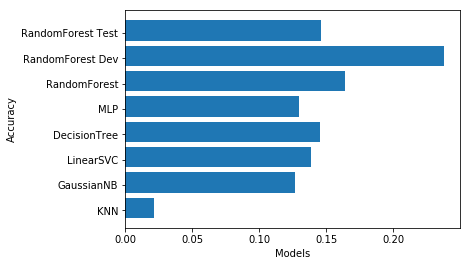

In [1038]:

y = np.arange(len(scores))
plt.barh(y, width= [(i-0.25) for i in scores])#,width=0.7)
plt.yticks(x-0.1, models)
plt.ylabel("Accuracy")
plt.xlabel("Models")
plt.show()

In [600]:
svcTuned = LinearSVC(dual=False)
accSum = []
for i in range(10):
    svcTuned.fit(X_train,y_train)
    accSum.append(svcTuned.score(X_dev,y_dev))    
print("Dev: ",np.mean(accSum))
print("Test: ",svcTuned.score(X_test, y_test))

Dev:  0.382716049383
Test:  0.366336633663


In [603]:
dtreeTuned = DecisionTreeClassifier(max_depth=2)
accSum = []
for i in range(10):
    dtreeTuned.fit(X_train,y_train)
    accSum.append(dtreeTuned.score(X_dev,y_dev))
print("Dev: ",np.mean(accSum))
print("Test: ",dtreeTuned.score(X_test,y_test))

Dev:  0.444444444444
Test:  0.356435643564
